# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [3]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [4]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
ファストリ
キーエンス
任天堂
ＮＴＴ
三井住友ＦＧ
リクルート
中外薬
ＫＤＤＩ
伊藤忠
ＳＢ
東京海上
ＳＢＧ
三菱商
東エレク
三菱重
みずほＦＧ
ＪＴ
信越化
三井物
ホンダ
武田
富士通
第一三共
キヤノン
ＯＬＣ
三菱電
['7203', '6758', '8306', '6501', '9983', '6861', '7974', '9432', '8316', '6098', '4519', '9433', '8001', '9434', '8766', '9984', '8058', '8035', '7011', '8411', '2914', '4063', '8031', '7267', '4502', '6702', '4568', '7751', '4661', '6503']


In [5]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [6]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,9983,6861,7974,9432,8316,6098,...,2914,4063,8031,7267,4502,6702,4568,7751,4661,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.988840,0.969175,0.984000,0.992380,0.994455,...,0.972455,0.980535,0.970608,1.031250,0.994306,0.986138,0.994916,0.984179,0.998713,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.988193,0.975975,0.983333,0.980088,1.001085,...,0.990419,0.984738,0.975727,1.032280,0.995401,0.964055,0.994113,0.994658,1.002575,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,0.993692,1.027199,0.992000,0.985988,0.993370,...,0.993772,0.990047,0.987450,1.025412,0.992992,0.964055,0.996521,0.996507,0.996138,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.985554,0.983656,0.973799,0.982321,0.994573,0.967552,0.970787,...,1.005749,0.986347,0.988415,0.973980,0.999776,1.011334,0.989749,0.989727,0.984516,0.976092
2025-03-31,0.941515,0.977414,0.923112,0.925094,0.947527,0.945819,0.916591,0.981683,0.932891,0.924312,...,0.985389,0.948075,0.940060,0.944093,0.987690,0.955635,0.947127,0.954387,0.950000,0.935673
2025-04-01,0.946734,0.977414,0.915309,0.919743,0.955699,0.936115,0.925204,0.980326,0.920354,0.940488,...,0.995928,0.947851,0.948623,0.945851,1.009176,0.960492,1.004316,0.965276,0.943226,0.925009
2025-04-02,0.955911,0.957944,0.901308,0.927501,0.991398,0.935145,0.944696,0.968114,0.904867,0.977064,...,0.986826,0.945837,0.936199,0.957103,0.997762,0.957416,0.966280,0.964660,0.924677,0.942896
2025-04-03,0.906424,0.911734,0.836814,0.867576,0.974194,0.898916,0.913871,0.966757,0.835300,0.961251,...,0.969581,0.921218,0.914876,0.934951,1.016115,0.929080,0.979768,0.916992,0.919355,0.911249
2025-04-04,0.866475,0.868380,0.765894,0.817014,0.965591,0.884522,0.904533,0.977612,0.768191,0.896910,...,0.973892,0.871531,0.890698,0.883966,1.002014,0.909812,0.976531,0.880214,0.941290,0.869797


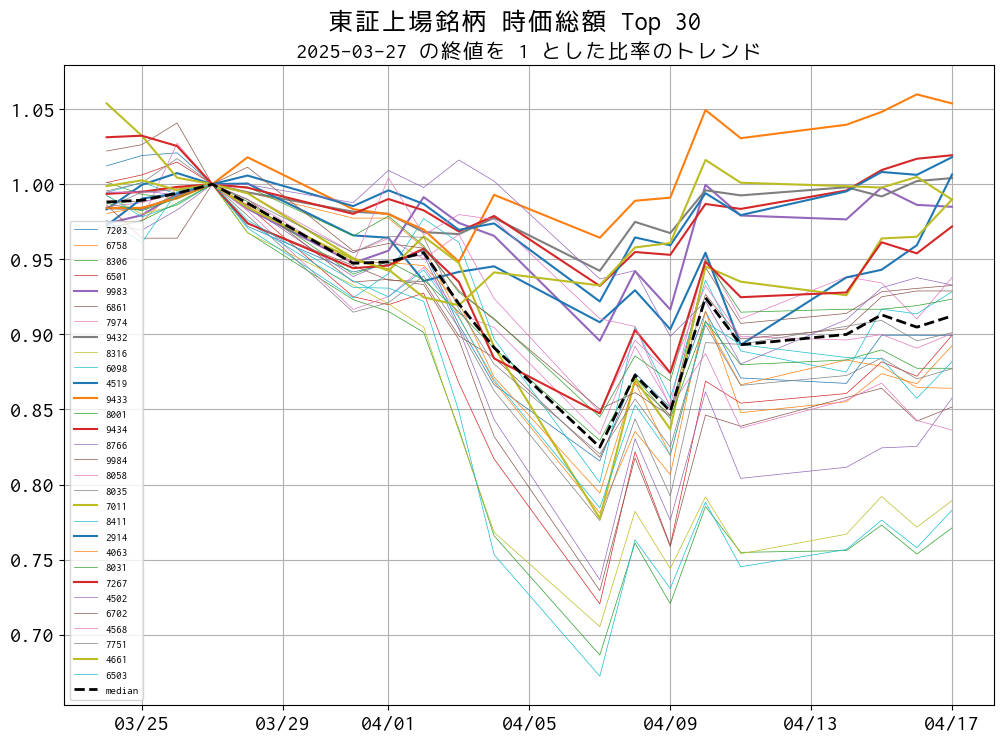

In [7]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    match colname:
        case '4519':
            width = 1.5
            lstyle = 'solid'
        case '7011':
            width = 1.5
            lstyle = 'solid'
        case '7267':
            width = 1.5
            lstyle = 'solid'
        case '9983':
            width = 1.5
            lstyle = 'solid'
        case '4661':
            width = 1.5
            lstyle = 'solid'
        case '2914':
            width = 1.5
            lstyle = 'solid'
        case '9432':
            width = 1.5
            lstyle = 'solid'
        case '9433':
            width = 1.5
            lstyle = 'solid'
        case '9434':
            width = 1.5
            lstyle = 'solid'
        case _:
            width = 0.5
            lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [14]:
for code in ['9433', '9434', '2914', '4519', '9432', '7011', '4661', '9983', '7267']:
    get_code_into(code)
    print()

9433 KDDI Corporation
2025-04-15    1.048135
2025-04-16    1.059804
2025-04-17    1.053761
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-15    1.009407
2025-04-16    1.016933
2025-04-17    1.019285
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-15    1.008144
2025-04-16    1.006228
2025-04-17    1.017964
Name: Close, dtype: float64

4519 Chugai Pharmaceutical Co., Ltd.
2025-04-15    0.943032
2025-04-16    0.959369
2025-04-17    1.006535
Name: Close, dtype: float64

9432 Nippon Telegraph and Telephone Corporation
2025-04-15    0.991859
2025-04-16    1.002035
2025-04-17    1.004071
Name: Close, dtype: float64

7011 Mitsubishi Heavy Industries, Ltd.
2025-04-15    0.963869
2025-04-16    0.964998
2025-04-17    0.989838
Name: Close, dtype: float64

4661 Oriental Land Co., Ltd.
2025-04-15    0.997742
2025-04-16    1.004839
2025-04-17    0.989677
Name: Close, dtype: float64

9983 Fast Retailing Co., Ltd.
2025-04-15    0.997849
2025-04-16    0.986237
2025-04-17    0.984

In [9]:
summary

,7203,6758,8306,6501,9983,6861,7974,9432,8316,6098,...,2914,4063,8031,7267,4502,6702,4568,7751,4661,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.988840,0.969175,0.984000,0.992380,0.994455,...,0.972455,0.980535,0.970608,1.031250,0.994306,0.986138,0.994916,0.984179,0.998713,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.988193,0.975975,0.983333,0.980088,1.001085,...,0.990419,0.984738,0.975727,1.032280,0.995401,0.964055,0.994113,0.994658,1.002575,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,0.993692,1.027199,0.992000,0.985988,0.993370,...,0.993772,0.990047,0.987450,1.025412,0.992992,0.964055,0.996521,0.996507,0.996138,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.985554,0.983656,0.973799,0.982321,0.994573,0.967552,0.970787,...,1.005749,0.986347,0.988415,0.973980,0.999776,1.011334,0.989749,0.989727,0.984516,0.976092
2025-03-31,0.941515,0.977414,0.923112,0.925094,0.947527,0.945819,0.916591,0.981683,0.932891,0.924312,...,0.985389,0.948075,0.940060,0.944093,0.987690,0.955635,0.947127,0.954387,0.950000,0.935673
2025-04-01,0.946734,0.977414,0.915309,0.919743,0.955699,0.936115,0.925204,0.980326,0.920354,0.940488,...,0.995928,0.947851,0.948623,0.945851,1.009176,0.960492,1.004316,0.965276,0.943226,0.925009
2025-04-02,0.955911,0.957944,0.901308,0.927501,0.991398,0.935145,0.944696,0.968114,0.904867,0.977064,...,0.986826,0.945837,0.936199,0.957103,0.997762,0.957416,0.966280,0.964660,0.924677,0.942896
2025-04-03,0.906424,0.911734,0.836814,0.867576,0.974194,0.898916,0.913871,0.966757,0.835300,0.961251,...,0.969581,0.921218,0.914876,0.934951,1.016115,0.929080,0.979768,0.916992,0.919355,0.911249
2025-04-04,0.866475,0.868380,0.765894,0.817014,0.965591,0.884522,0.904533,0.977612,0.768191,0.896910,...,0.973892,0.871531,0.890698,0.883966,1.002014,0.909812,0.976531,0.880214,0.941290,0.869797


In [10]:
summary.tail(1).iloc[0]

7203    0.899226
6758    0.892523
8306    0.771173
6501    0.899411
9983    0.984946
6861    0.932557
7974    0.937897
9432    1.004071
8316    0.789331
6098    0.928416
4519    1.006535
9433    1.053761
8001    0.923464
9434    1.019285
8766    0.857657
9984    0.851625
8058    0.900618
8035    0.901110
7011    0.989838
8411    0.782989
2914    1.017964
4063    0.864145
8031    0.877435
7267    0.971871
4502    0.932856
6702    0.928918
4568    0.836256
7751    0.877132
4661    0.989677
6503    0.881837
Name: 2025-04-17 00:00:00, dtype: float64

In [11]:
summary.median(axis=1)

2025-03-24    0.988073
2025-03-25    0.989306
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.987381
2025-03-31    0.947327
2025-04-01    0.948237
2025-04-02    0.954477
2025-04-03    0.920286
2025-04-04    0.891153
2025-04-07    0.824919
2025-04-08    0.872879
2025-04-09    0.848856
2025-04-10    0.924382
2025-04-11    0.893107
2025-04-14    0.899958
2025-04-15    0.913023
2025-04-16    0.904825
2025-04-17    0.912287
dtype: float64